In [12]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Import des données

In [3]:
data = pd.read_csv('../data/application_train_vf.csv')

In [4]:
features = ['ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE']

In [6]:
data = data[features]

# Data Visualisation

In [10]:
nums = data.select_dtypes(exclude = 'object').columns.to_list()
cats = data.select_dtypes(include = 'object').columns.to_list()

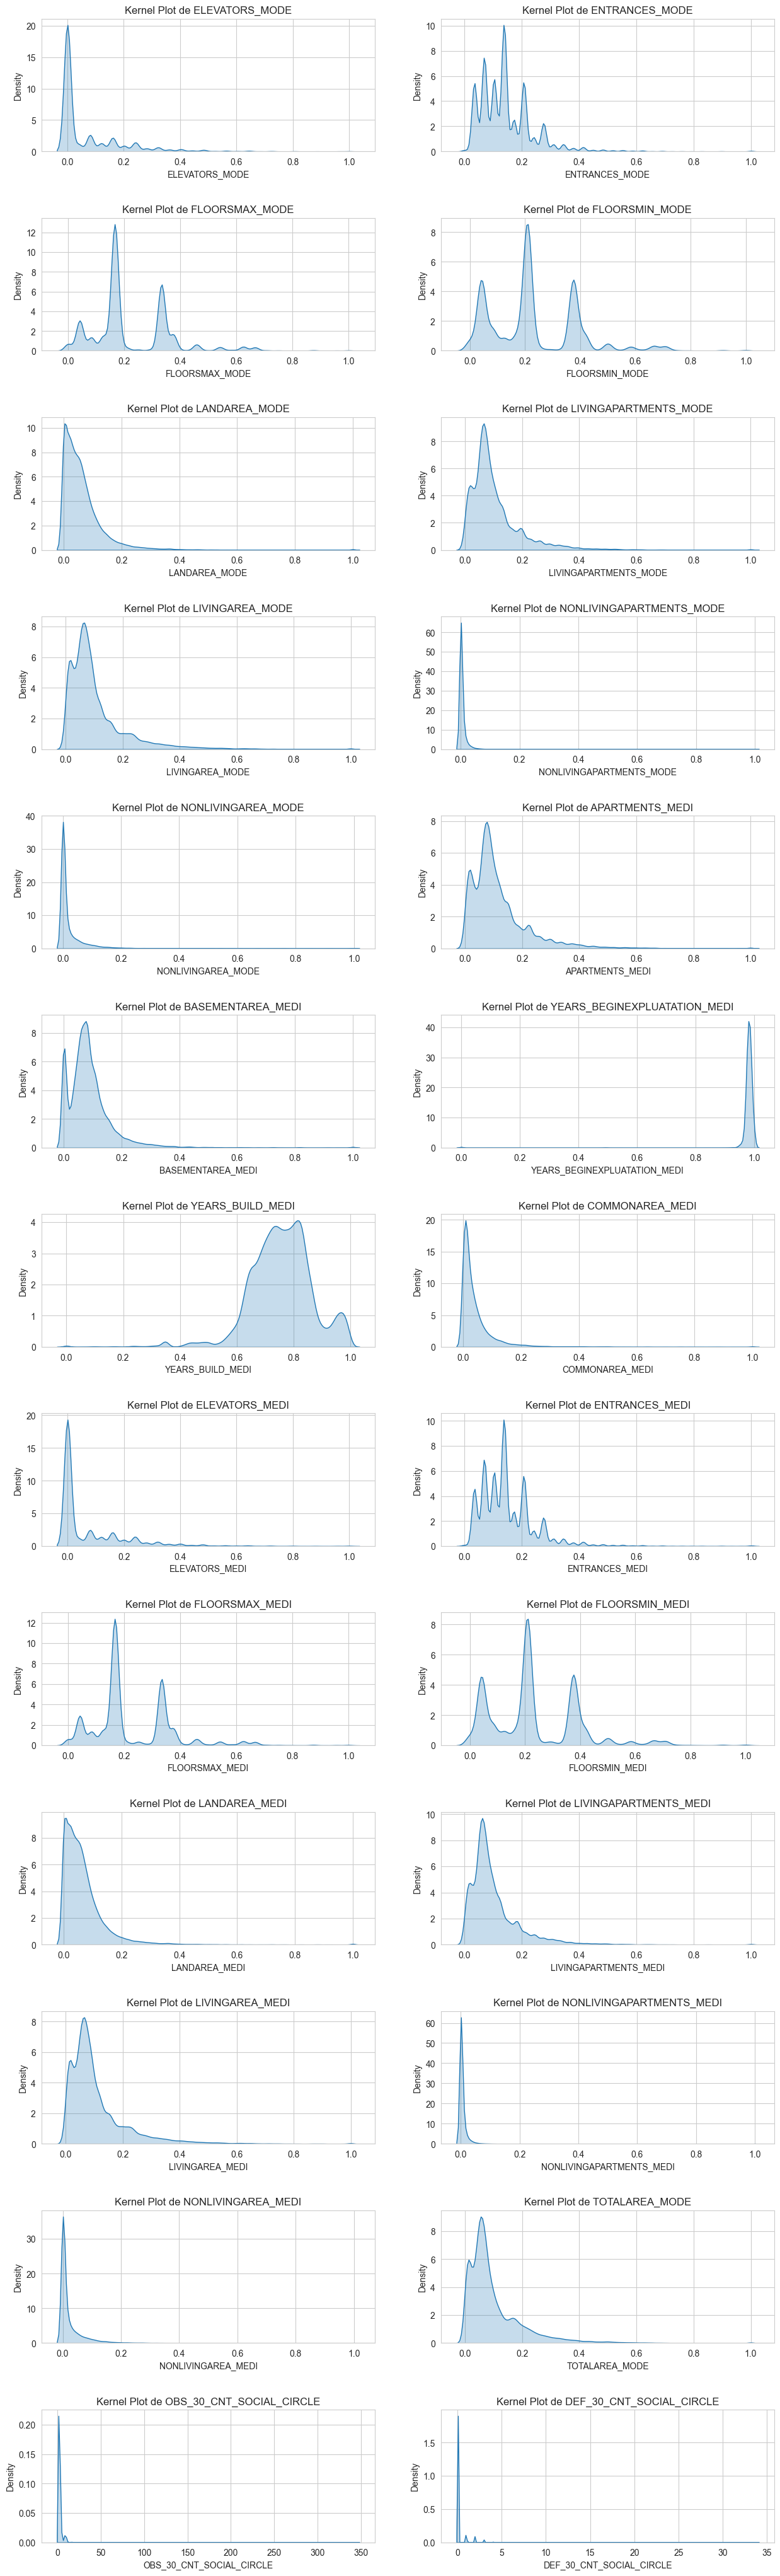

In [13]:
num_cols = 2
num_rows = (len(nums) + 1) // 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, col in enumerate(nums):
    sns.kdeplot(x=data[col], ax=axes[i], fill=True)
    axes[i].set_title(f'Kernel Plot de {col}')

plt.show()

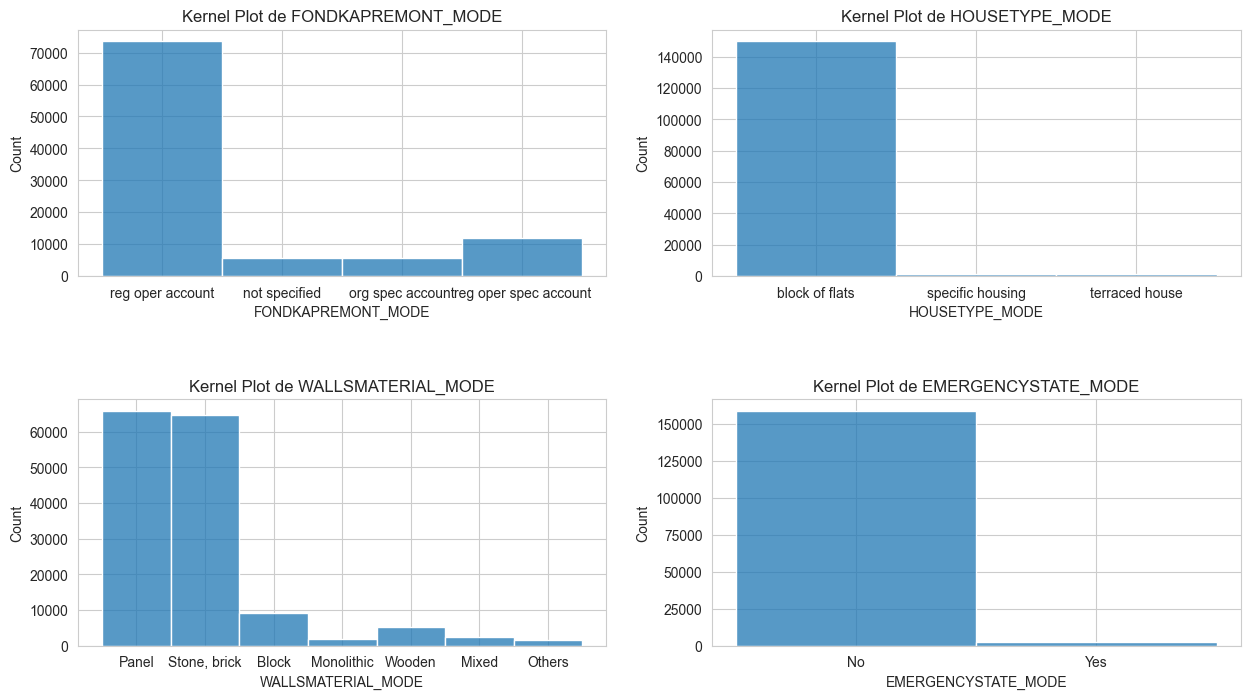

In [16]:
num_cols = 2
num_rows = (len(cats) + 1) // 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, col in enumerate(cats):
    sns.histplot(x=data[col], ax=axes[i], fill=True)
    axes[i].set_title(f'Kernel Plot de {col}')

plt.show()

## Sélection de variables

In [ ]:
var_cat_dependantes = []

for column in data.columns :
    if column != 'fl_pass_DET':  
        contingency_table = pd.crosstab(df['fl_pass_DET'], df[column])
        _, p_value, _, _ = chi2_contingency(contingency_table)
        
        if p_value > 0.05 :
            print(colored(f"On conserve H0, {column} et fl_pass_DET sont indépendantes : p-value = {p_value}", 'red'))
        if p_value < 0.05 :
            print(colored(f"On rejette H0, {column} et fl_pass_DET ne sont pas indépendantes : p-value = {p_value}", 'green'))
            var_cat_dependantes.append(column)

In [ ]:
AA